In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("crime_data.csv")

In [3]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Hierarchical clustering

In [4]:
# Droping the uncessary column that is the Unnamed: 0

In [5]:
x=df.iloc[:,1:]
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [7]:
# set the graph 

In [8]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

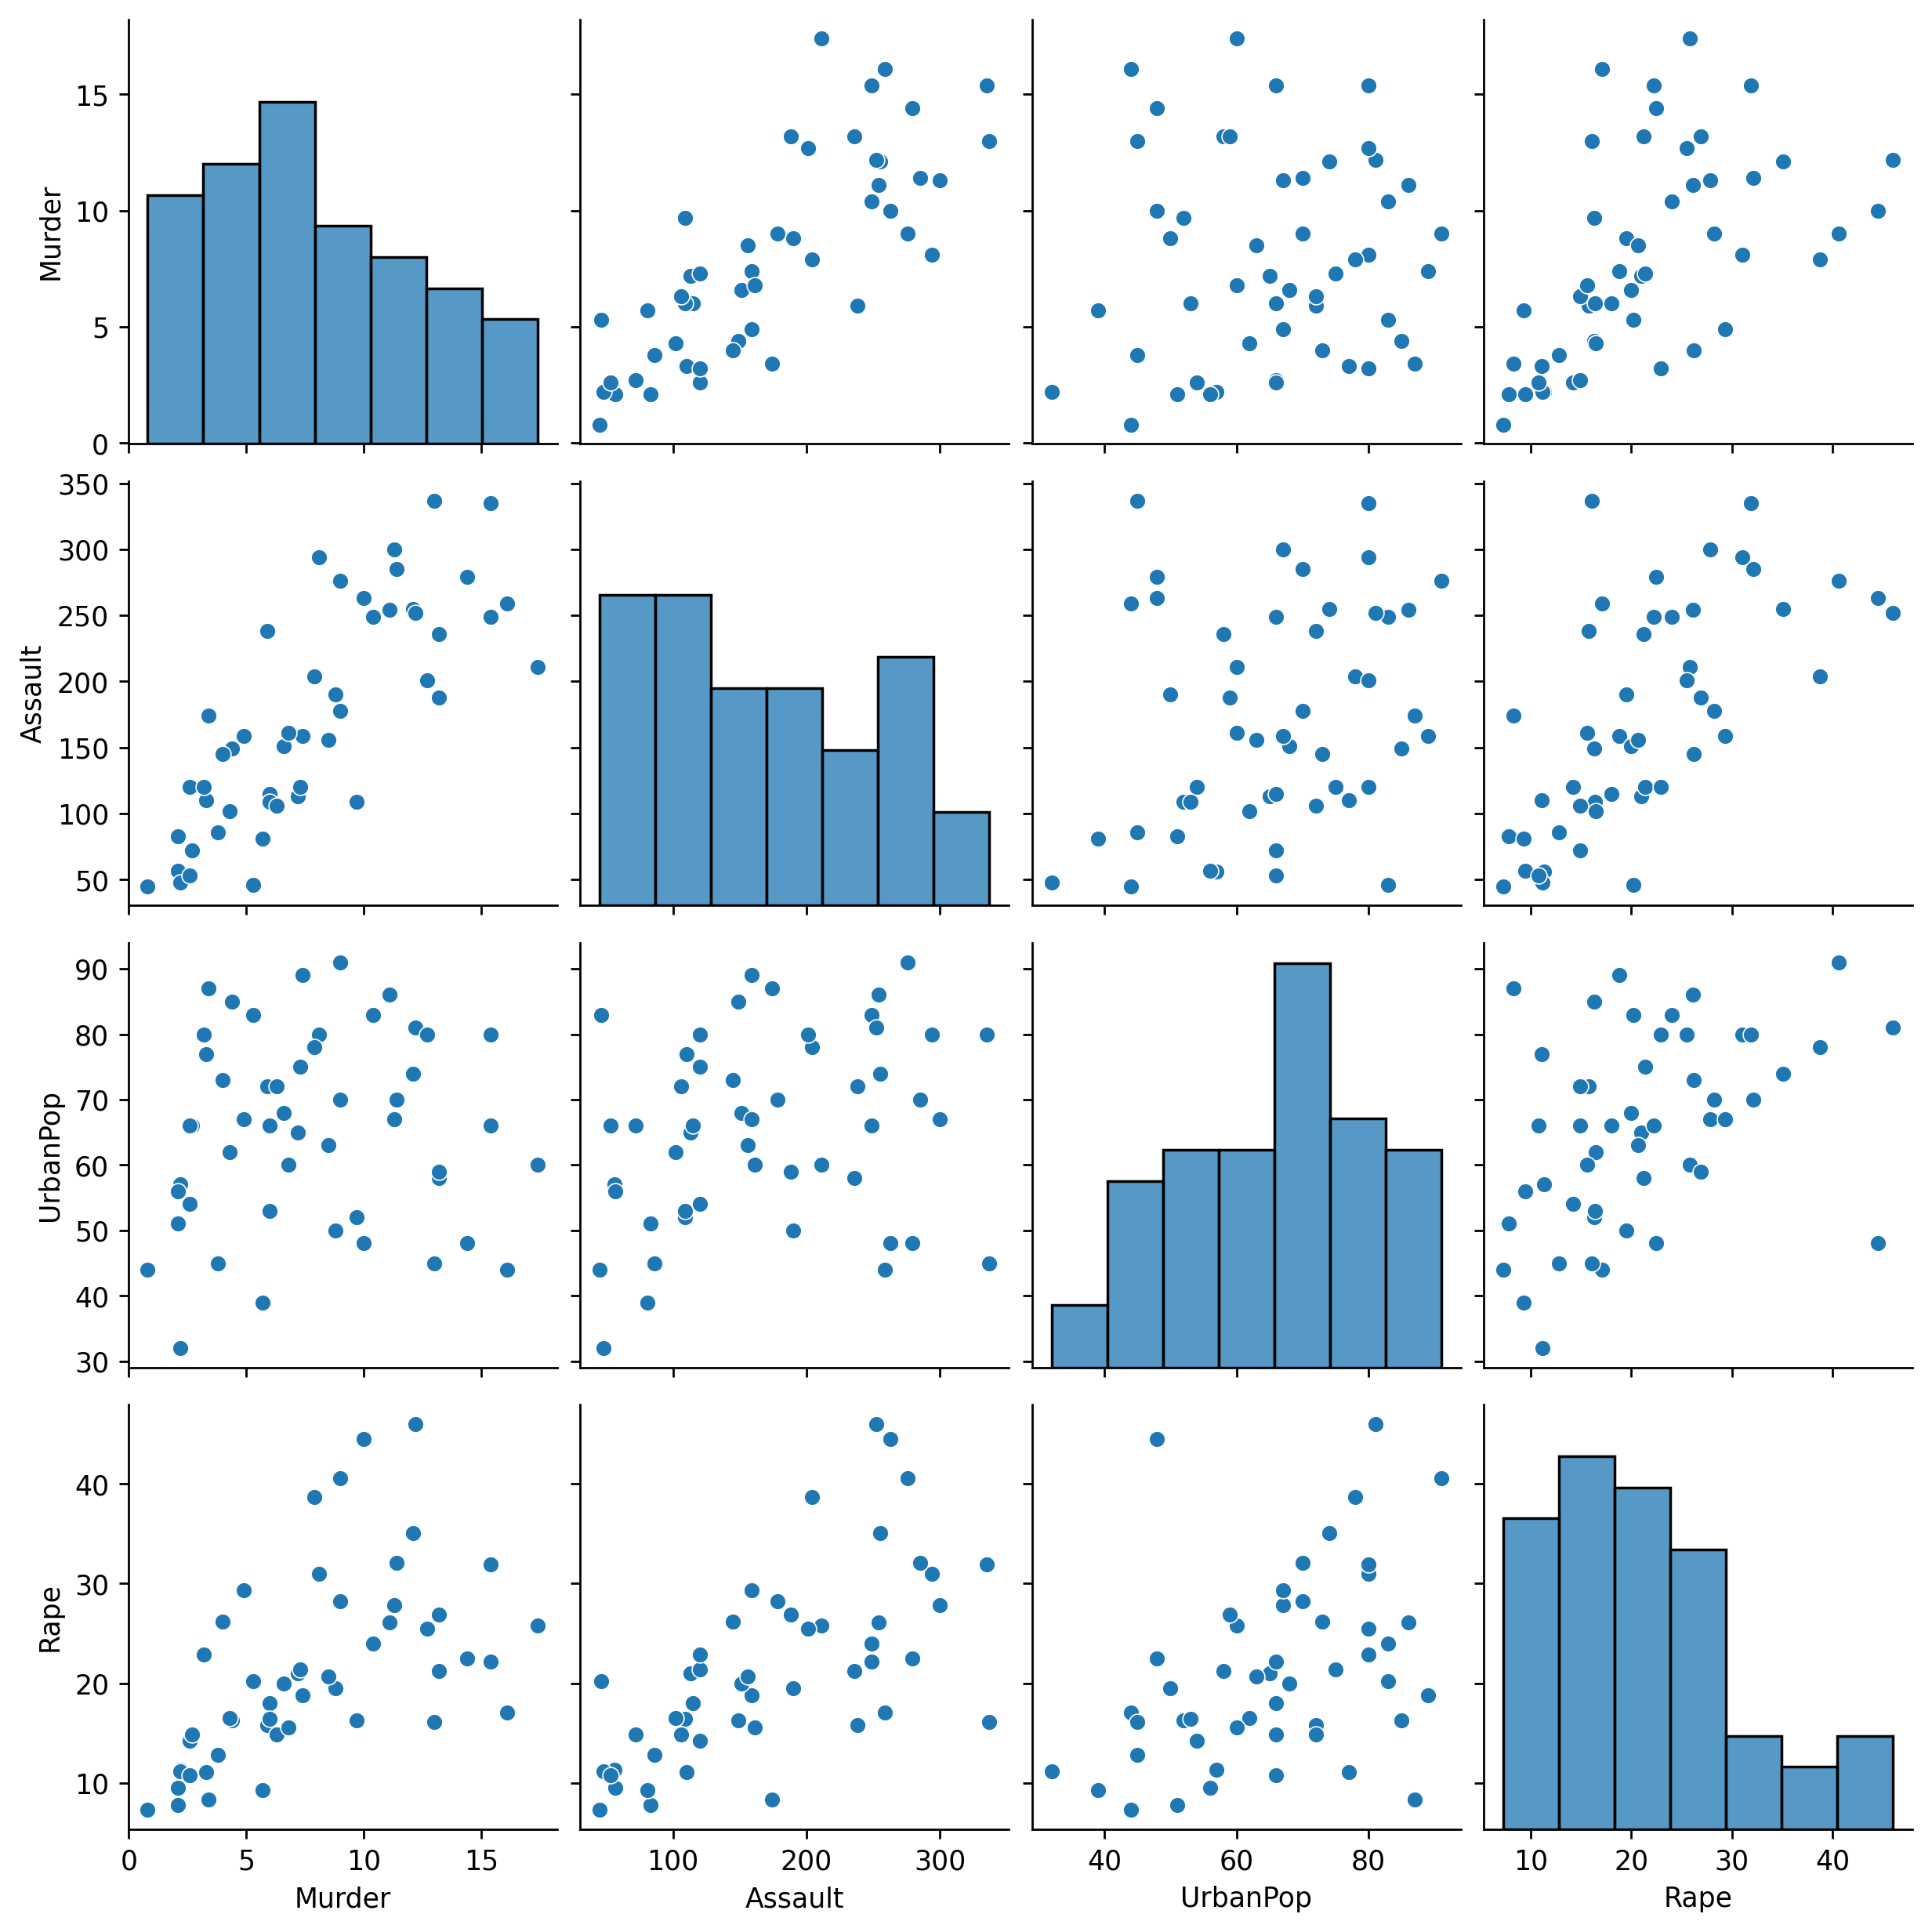

In [9]:
sns.pairplot(df)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x=sc.fit_transform(x)

In [13]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Create a Dendrogram

In [14]:
from scipy.cluster import hierarchy

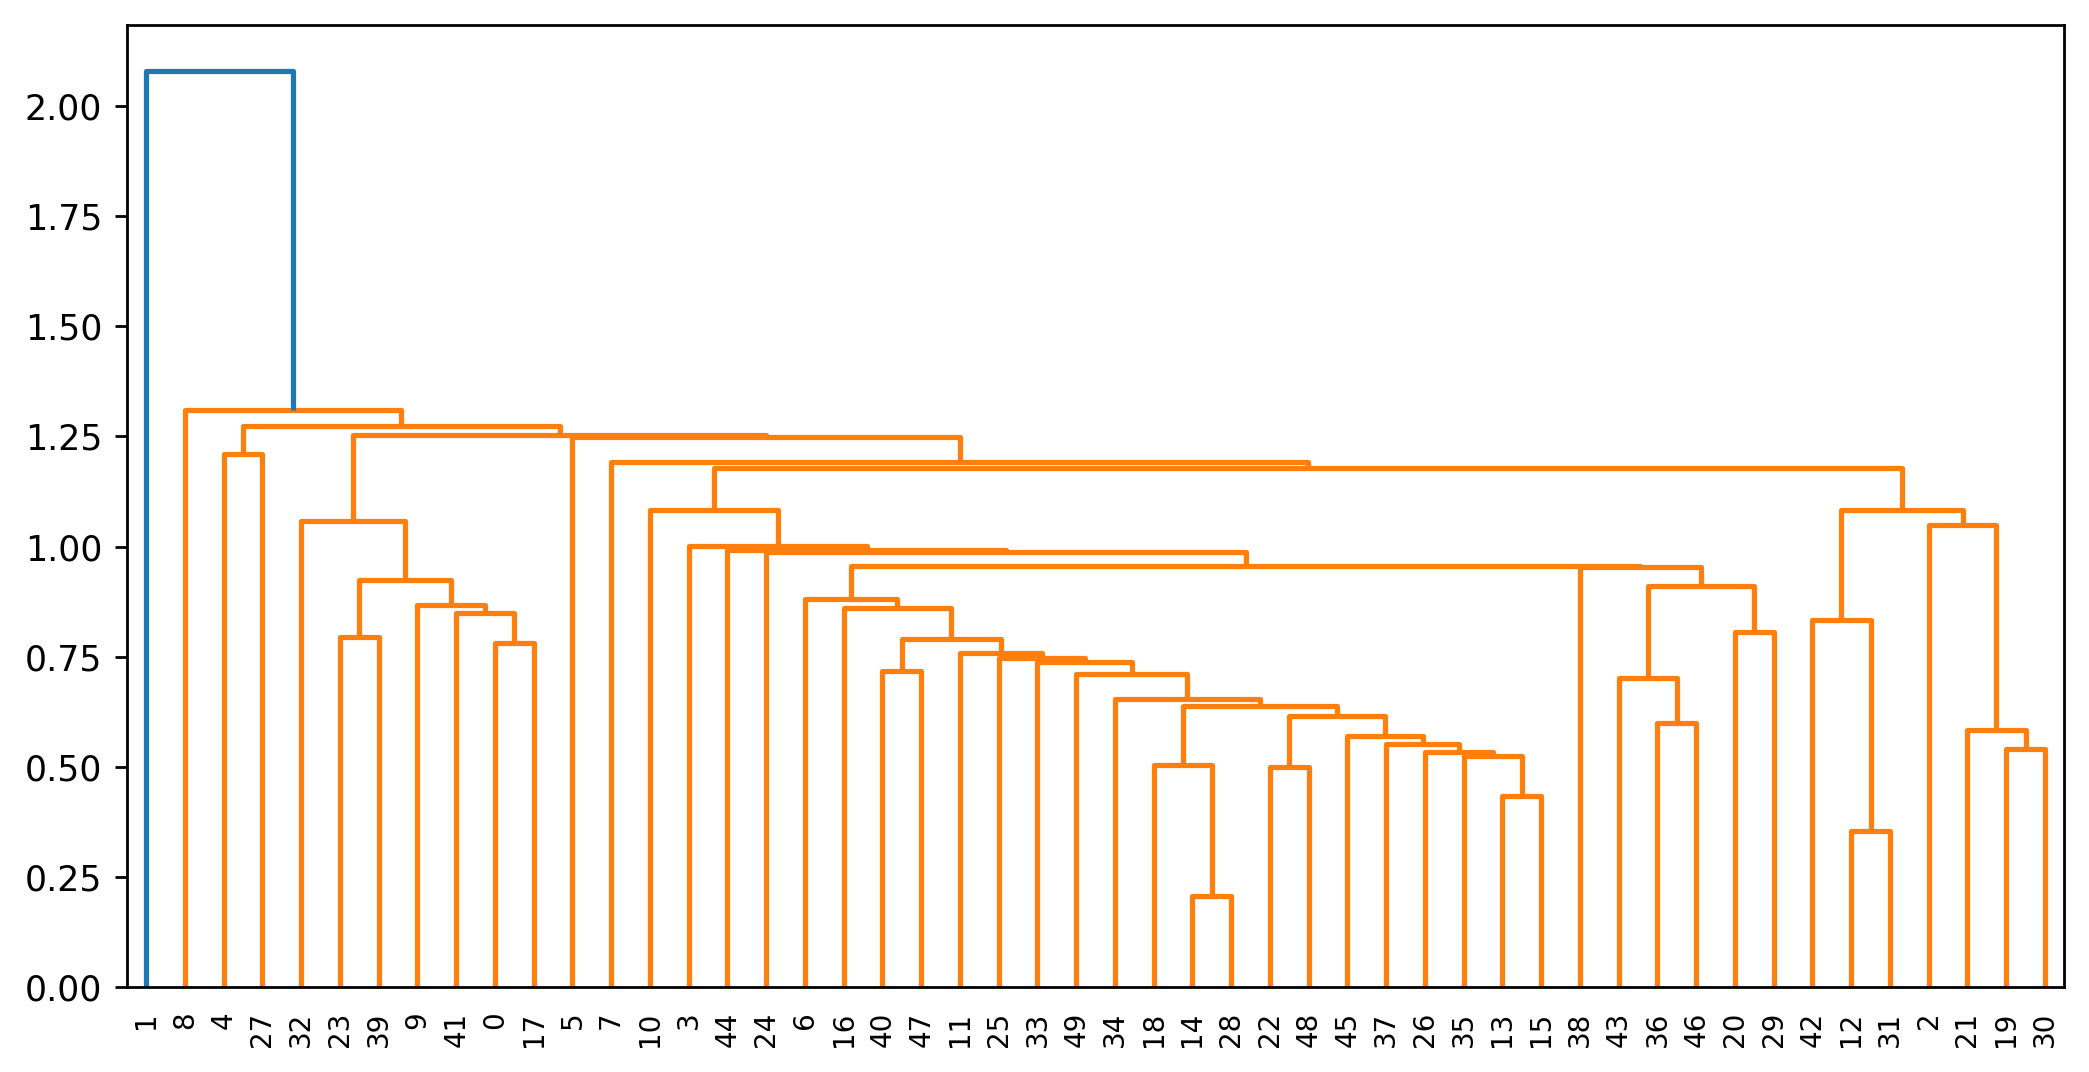

In [15]:
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)

In [16]:
# In the above dendrogram the method of distance calculation is single
# so it is little bit confusing to calculate the number of cluster

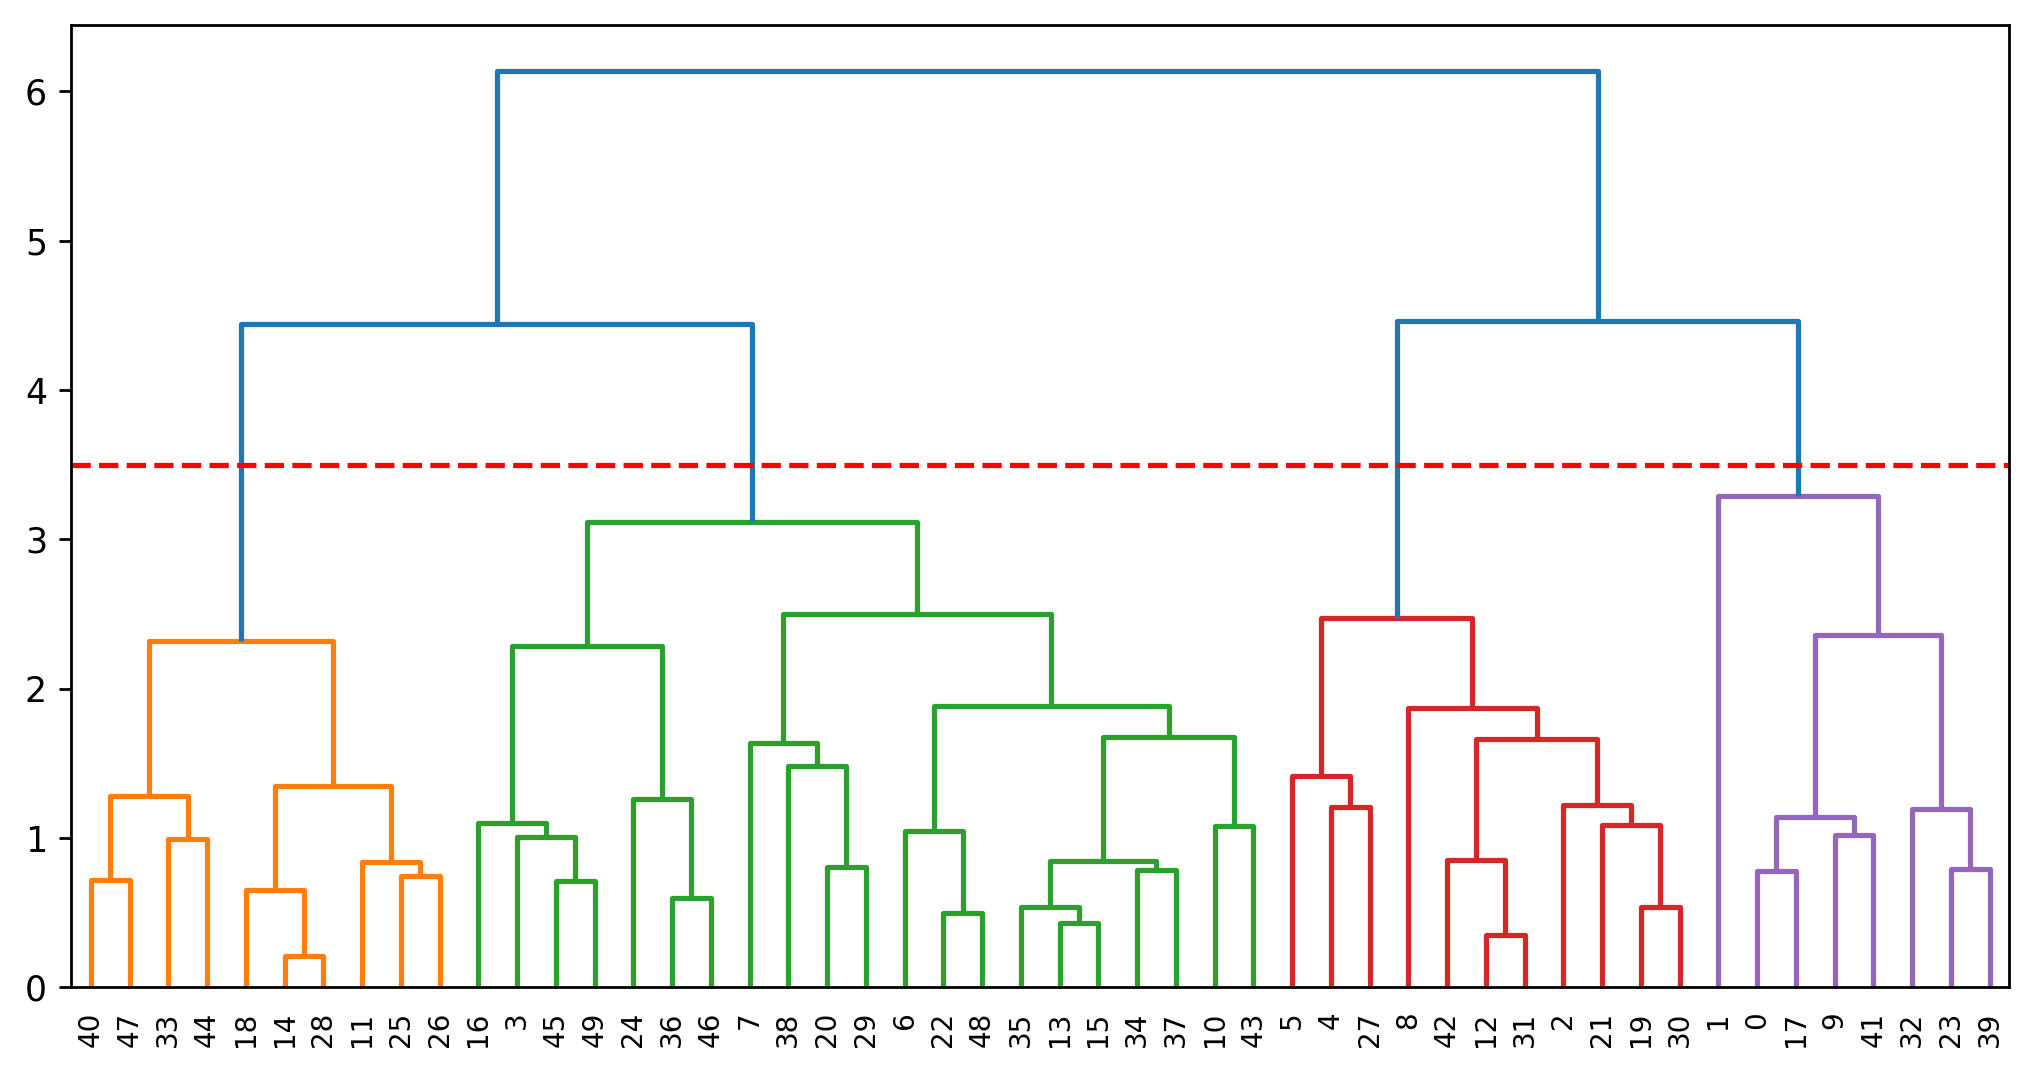

In [17]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)
plt.axhline(y=3.5,c='red',linestyle='--')

## Model Building

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc=AgglomerativeClustering(n_clusters=4)

In [20]:
y=hc.fit_predict(x)

In [21]:
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [22]:
# Create new column to store cluster label

In [23]:
df['cluster']=y

In [24]:
df.groupby('cluster').agg('mean')

C:\Users\SHUBHAM\AppData\Local\Temp\ipykernel_11204\2878383846.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [25]:
df.reset_index(inplace=True)

In [26]:
df.drop(columns=['index'],inplace=True)

<Axes: xlabel='Murder', ylabel='Rape'>

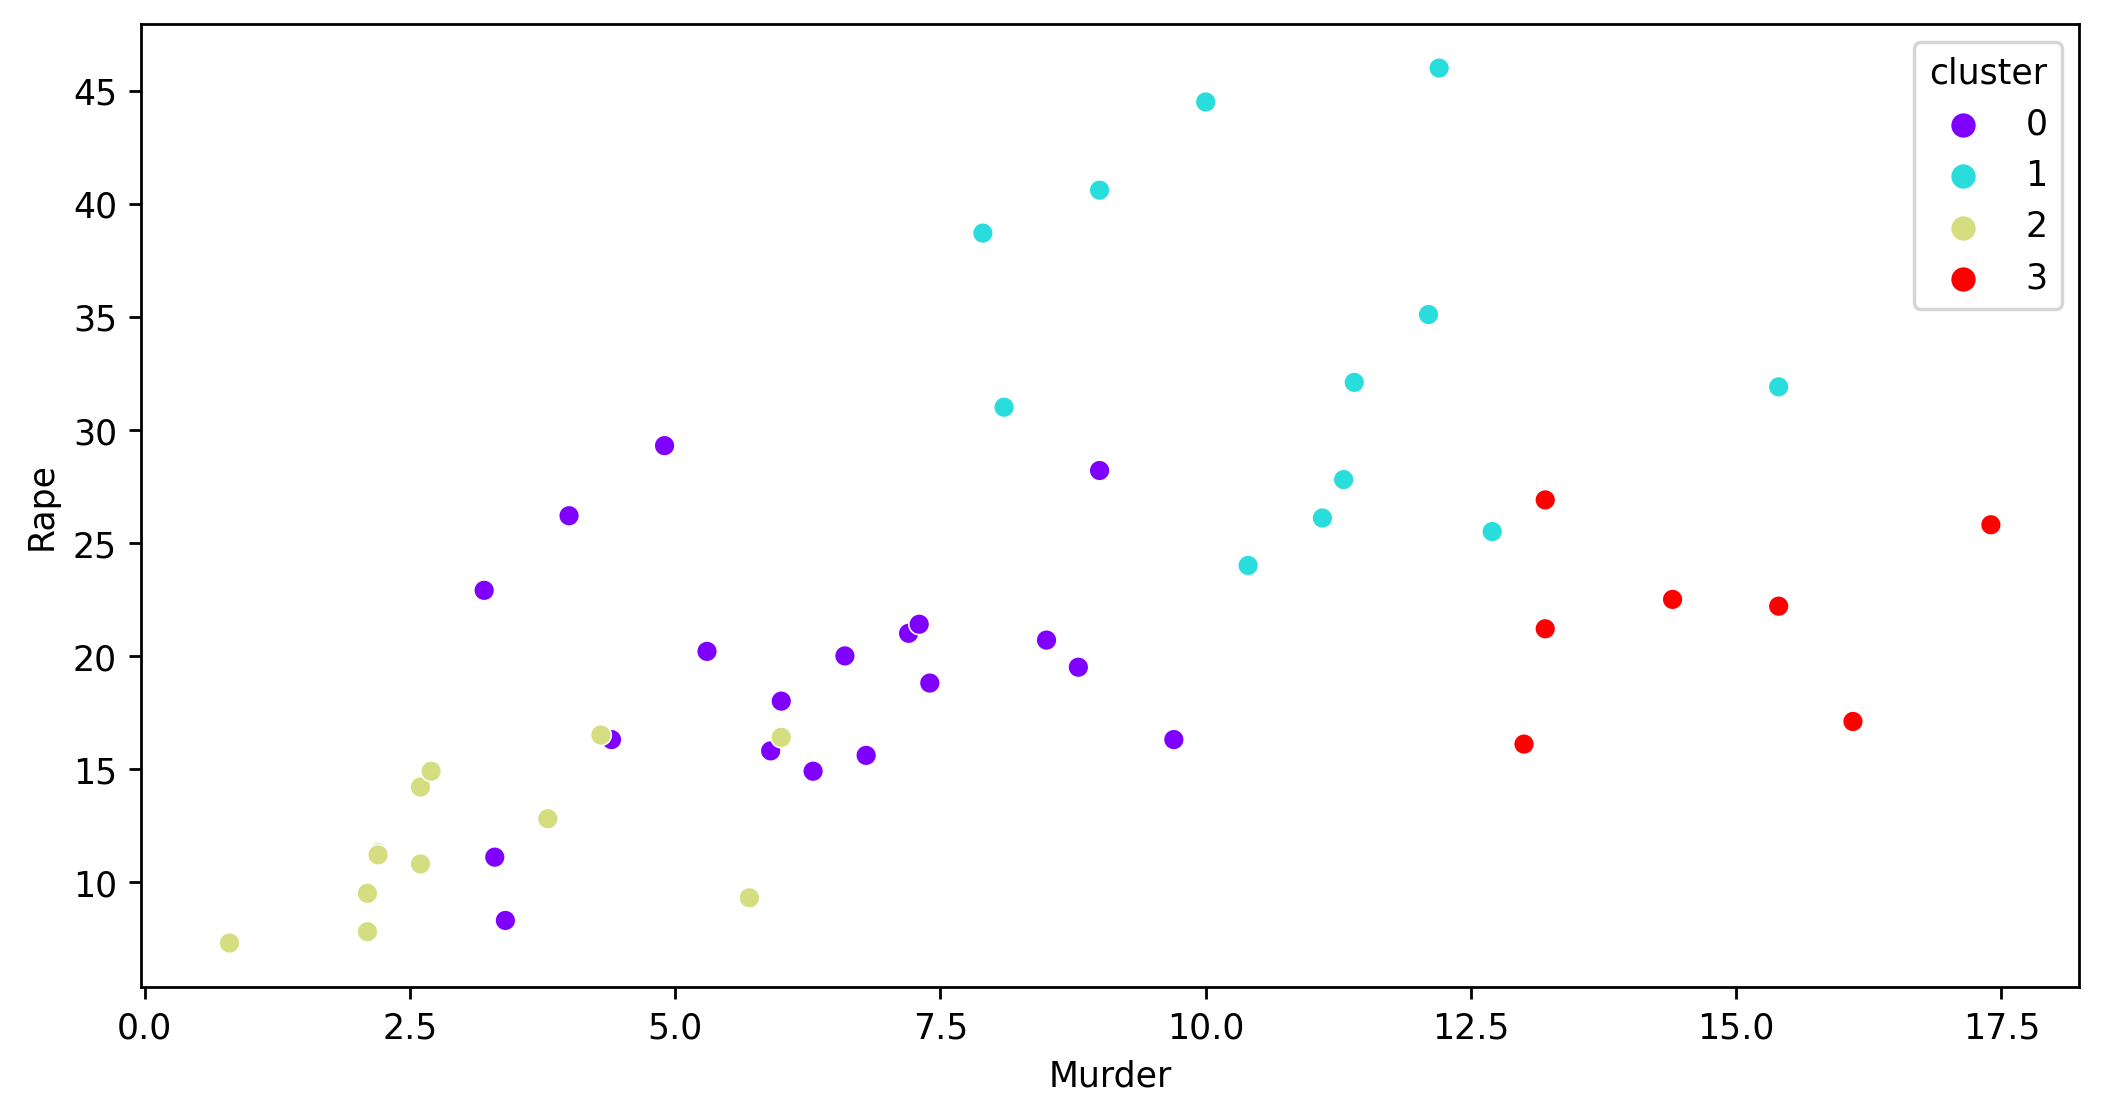

In [28]:
sns.scatterplot(x=df['Murder'],y=df['Rape'],hue=df['cluster'],palette='rainbow')